In [2]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, 
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


#load data
train_df = pd.read_csv('ieee_merged_train.csv')
test_df = pd.read_csv('ieee_merged_test.csv')



In [3]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [21]:
print(train_df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

Data Exploration


 TARGET VARIABLE: isFraud
--------------------------------------------------------------------------------

Fraud Distribution:
  Legitimate (0): 569,877 (96.50%)
  Fraud (1):      20,663 (3.50%)

 Class Imbalance Ratio: 27.6:1

  💾 Saved: fraud_distribution.png


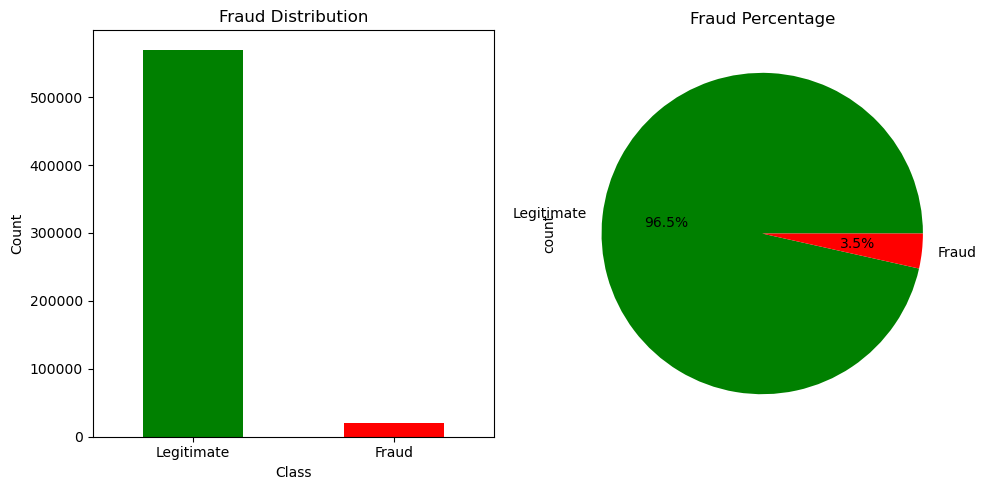

In [4]:
# === TARGET VARIABLE ===
print("\n TARGET VARIABLE: isFraud")
print("-"*80)

if 'isFraud' in train_df.columns:
    fraud_counts = train_df['isFraud'].value_counts()
    fraud_rate = train_df['isFraud'].mean()
    
    print(f"\nFraud Distribution:")
    print(f"  Legitimate (0): {fraud_counts.get(0, 0):,} ({(fraud_counts.get(0, 0)/len(train_df))*100:.2f}%)")
    print(f"  Fraud (1):      {fraud_counts.get(1, 0):,} ({(fraud_counts.get(1, 0)/len(train_df))*100:.2f}%)")
    print(f"\n Class Imbalance Ratio: {fraud_counts.get(0, 0)/fraud_counts.get(1, 1):.1f}:1")
    
    # Visualize
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    fraud_counts.plot(kind='bar', color=['green', 'red'])
    plt.title('Fraud Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Legitimate', 'Fraud'], rotation=0)
    
    plt.subplot(1, 2, 2)
    fraud_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Legitimate', 'Fraud'])
    plt.title('Fraud Percentage')
    
    plt.tight_layout()
    plt.savefig('fraud_distribution.png', dpi=300, bbox_inches='tight')
    print("\n  💾 Saved: fraud_distribution.png")
else:
    print("\n 'isFraud' column not found in training set!")


In [5]:
# === FEATURE TYPES ===
print("\n FEATURE TYPES")
print("-"*80)

# Categorize columns
transaction_cols = [col for col in train_df.columns if col.startswith('Transaction')]
card_cols = [col for col in train_df.columns if col.startswith('card')]
addr_cols = [col for col in train_df.columns if col.startswith('addr')]
email_cols = [col for col in train_df.columns if 'email' in col.lower()]
match_cols = [col for col in train_df.columns if col.startswith('M')]
count_cols = [col for col in train_df.columns if col.startswith('C')]
distance_cols = [col for col in train_df.columns if col.startswith('dist')]
vesta_cols = [col for col in train_df.columns if col.startswith('V')]
device_cols = [col for col in train_df.columns if 'Device' in col]
id_cols = [col for col in train_df.columns if col.startswith('id_')]

print(f"\nFeature Categories:")
print(f"  Transaction features: {len(transaction_cols)}")
print(f"  Card features: {len(card_cols)}")
print(f"  Address features: {len(addr_cols)}")
print(f"  Email features: {len(email_cols)}")
print(f"  Match features (M1-M9): {len(match_cols)}")
print(f"  Count features (C1-C14): {len(count_cols)}")
print(f"  Distance features: {len(distance_cols)}")
print(f"  Vesta features (V1-V339): {len(vesta_cols)}")
print(f"  Device features: {len(device_cols)}")
print(f"  Identity features (id_*): {len(id_cols)}")


 FEATURE TYPES
--------------------------------------------------------------------------------

Feature Categories:
  Transaction features: 3
  Card features: 6
  Address features: 2
  Email features: 2
  Match features (M1-M9): 9
  Count features (C1-C14): 14
  Distance features: 2
  Vesta features (V1-V339): 339
  Device features: 2
  Identity features (id_*): 38


In [6]:
# === MISSING VALUES ===
print("\n MISSING VALUES")
print("-"*80)

missing_stats = pd.DataFrame({
    'Column': train_df.columns,
    'Missing_Count': train_df.isnull().sum(),
    'Missing_Percent': (train_df.isnull().sum() / len(train_df)) * 100
})

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"\nColumns with missing values: {len(missing_stats)}/{len(train_df.columns)}")

if len(missing_stats) > 0:
    print(f"\nTop 10 columns with most missing data:")
    print(missing_stats.head(10).to_string(index=False))




 MISSING VALUES
--------------------------------------------------------------------------------

Columns with missing values: 414/434

Top 10 columns with most missing data:
Column  Missing_Count  Missing_Percent
 id_24         585793        99.196159
 id_25         585408        99.130965
 id_07         585385        99.127070
 id_08         585385        99.127070
 id_21         585381        99.126393
 id_26         585377        99.125715
 id_27         585371        99.124699
 id_23         585371        99.124699
 id_22         585371        99.124699
 dist2         552913        93.628374


In [7]:
# === 5. KEY FEATURES ANALYSIS ===
print("\n KEY FEATURES ANALYSIS")
print("-"*80)

# TransactionAmt
if 'TransactionAmt' in train_df.columns:
    print(f"\nTransactionAmt Statistics:")
    print(f"  Mean: ${train_df['TransactionAmt'].mean():.2f}")
    print(f"  Median: ${train_df['TransactionAmt'].median():.2f}")
    print(f"  Min: ${train_df['TransactionAmt'].min():.2f}")
    print(f"  Max: ${train_df['TransactionAmt'].max():.2f}")
    
    if 'isFraud' in train_df.columns:
        print(f"\nBy Fraud Status:")
        print(f"  Legitimate avg: ${train_df[train_df['isFraud']==0]['TransactionAmt'].mean():.2f}")
        print(f"  Fraud avg: ${train_df[train_df['isFraud']==1]['TransactionAmt'].mean():.2f}")

# ProductCD
if 'ProductCD' in train_df.columns:
    print(f"\nProductCD Distribution:")
    product_dist = train_df['ProductCD'].value_counts()
    for product, count in product_dist.items():
        print(f"  {product}: {count:,} ({count/len(train_df)*100:.1f}%)")


 KEY FEATURES ANALYSIS
--------------------------------------------------------------------------------

TransactionAmt Statistics:
  Mean: $135.03
  Median: $68.77
  Min: $0.25
  Max: $31937.39

By Fraud Status:
  Legitimate avg: $134.51
  Fraud avg: $149.24

ProductCD Distribution:
  W: 439,670 (74.5%)
  C: 68,519 (11.6%)
  R: 37,699 (6.4%)
  H: 33,024 (5.6%)
  S: 11,628 (2.0%)


In [8]:
# === DATA QUALITY SUMMARY ===
print("\n DATA QUALITY SUMMARY")
print("-"*80)

print(f"\nNumerical Features: {len(train_df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical Features: {len(train_df.select_dtypes(include=['object', 'category']).columns)}")
print(f"Overall Missing Rate: {train_df.isnull().sum().sum() / (len(train_df) * len(train_df.columns)) * 100:.2f}%")



 DATA QUALITY SUMMARY
--------------------------------------------------------------------------------

Numerical Features: 403
Categorical Features: 31
Overall Missing Rate: 45.07%


In [9]:
#since id cols are mostly missing and they are not useful for modeling, we will drop them
#DROPPING ID FROM TRAINING SET

# Drop all id_* columns
id_cols = [col for col in train_df.columns if col.startswith('id_')]
train_df_clean = train_df.drop(columns=id_cols)

print(f"Dropped {len(id_cols)} id_* columns")
print(f"   {len(train_df.columns)} → {len(train_df_clean.columns)} columns")

# Fill remaining missing values
cat_cols = train_df_clean.select_dtypes(include=['object']).columns
train_df_clean[cat_cols] = train_df_clean[cat_cols].fillna('missing')

num_cols = [c for c in train_df_clean.select_dtypes(include=['number']).columns 
            if c not in ['isFraud', 'TransactionID']]
for col in num_cols:
    train_df_clean[col] = train_df_clean[col].fillna(train_df_clean[col].median())

print(f"   Missing values: {train_df_clean.isnull().sum().sum()}")

Dropped 38 id_* columns
   434 → 396 columns
   Missing values: 0


In [10]:
#DROPPING ID FROM TEST SET

id_cols = [col for col in test_df.columns if col.startswith('id-')]
test_df_clean = test_df.drop(columns=id_cols)

# Fill missing values
cat_cols = test_df_clean.select_dtypes(include=['object']).columns
test_df_clean[cat_cols] = test_df_clean[cat_cols].fillna('missing')

num_cols = [c for c in test_df_clean.select_dtypes(include=['number']).columns 
            if c not in ['isFraud', 'TransactionID']]
for col in num_cols:
    test_df_clean[col] = test_df_clean[col].fillna(test_df_clean[col].median())

print(f"Test set: {len(test_df.columns)} → {len(test_df_clean.columns)} columns")

Test set: 433 → 395 columns


In [11]:
# ============================================================================
# SELECT OPTIMAL FEATURES FOR MODELING
# ============================================================================

def select_optimal_features(df):

    #Drop V* columns with >70% missing (keep useful ones)
    v_cols = [col for col in df.columns if col.startswith('V')]
    v_missing = {col: df[col].isnull().sum() / len(df) for col in v_cols}
    v_to_drop = [col for col, missing_rate in v_missing.items() if missing_rate > 0.7]
    
    df = df.drop(columns=v_to_drop)
    print(f"  ✓ Dropped {len(v_to_drop)} V* columns with >70% missing")
    print(f"  ✓ Kept {len(v_cols) - len(v_to_drop)} useful V* columns")
    
    # Keep all core features
    core_features = [
        'TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
        'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
        'addr1', 'addr2',
        'P_emaildomain', 'R_emaildomain',
        'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
        'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
        'dist1', 'dist2',
        'DeviceType', 'DeviceInfo',
        'isFraud'
    ]
    
    core_kept = [c for c in core_features if c in df.columns]
    print(f"  ✓ All {len(core_kept)} core features preserved")
    
    print(f"\n FINAL DATASET:")
    print(f"  Columns: {len(df.columns)}")
    print(f"  Missing: {df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100:.2f}%")
    
    return df

train_df_optimal = select_optimal_features(train_df)
test_df_optimal = select_optimal_features(test_df)

print(f"\nOptimal features selected!")

  ✓ Dropped 159 V* columns with >70% missing
  ✓ Kept 180 useful V* columns
  ✓ All 42 core features preserved

 FINAL DATASET:
  Columns: 275
  Missing: 25.08%
  ✓ Dropped 159 V* columns with >70% missing
  ✓ Kept 180 useful V* columns
  ✓ All 41 core features preserved

 FINAL DATASET:
  Columns: 274
  Missing: 20.21%

Optimal features selected!


In [12]:
print(train_df_optimal.columns.tolist())
print(test_df_optimal.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [37]:
# Find columns to remove
v_cols = [col for col in train_df_optimal.columns if col.startswith('V')]
id_cols = [col for col in train_df_optimal.columns if col.startswith('id_')]
train_df_optimal = train_df_optimal.drop(columns=v_cols + id_cols)


v_cols = [col for col in test_df_optimal.columns if col.startswith('V')]
id_cols = [col for col in test_df_optimal.columns if col.startswith('id_')]
test_df_optimal = test_df_optimal.drop(columns=v_cols + id_cols)


In [38]:
print(train_df_optimal.columns.tolist())
print(test_df_optimal.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo']
['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-

Data Preprocessing for model

In [39]:
# ============================================================================
# PREPARE FEATURES FOR MODELING
# ============================================================================

print("\n" + "="*80)
print("STEP 2: Feature Preparation")
print("="*80)

# Separate features and target
X = train_df_optimal.drop(['isFraud', 'TransactionID'], axis=1, errors='ignore')
y = train_df_optimal['isFraud']

print(f"\n Feature Matrix:")
print(f"  Shape: {X.shape}")
print(f"  Features: {len(X.columns)}")
print(f"\n Target Variable:")
print(f"  Total samples: {len(y):,}")
print(f"  Legitimate (0): {(y==0).sum():,} ({(y==0).mean()*100:.2f}%)")
print(f"  Fraud (1): {(y==1).sum():,} ({(y==1).mean()*100:.2f}%)")
print(f"  Class imbalance ratio: {(y==0).sum()/(y==1).sum():.1f}:1")


STEP 2: Feature Preparation

 Feature Matrix:
  Shape: (590540, 55)
  Features: 55

 Target Variable:
  Total samples: 590,540
  Legitimate (0): 569,877 (96.50%)
  Fraud (1): 20,663 (3.50%)
  Class imbalance ratio: 27.6:1


In [40]:
# ============================================================================
# ENCODE CATEGORICAL & HANDLE MISSING VALUES
# ============================================================================

print("\n" + "="*80)
print("STEP 3: Preprocessing")
print("="*80)

# Encode categorical variables
label_encoders = {}
cat_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"\n🔤 Encoding categorical variables...")
for col in cat_cols:
    le = LabelEncoder()
    X[col] = X[col].fillna('missing')
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print(f"  ✓ Encoded {len(cat_cols)} categorical columns")

# Fill numerical missing values with median
num_cols = X.select_dtypes(include=[np.number]).columns
missing_before = X.isnull().sum().sum()

print(f"\n🔢 Handling missing values...")
print(f"  Missing values before: {missing_before:,}")

for col in num_cols:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].median())

missing_after = X.isnull().sum().sum()
print(f"  Missing values after: {missing_after:,}")
print(f"  ✓ Filled missing values in {len(num_cols)} numerical columns")



STEP 3: Preprocessing

🔤 Encoding categorical variables...
  ✓ Encoded 16 categorical columns

🔢 Handling missing values...
  Missing values before: 6,202,450
  Missing values after: 0
  ✓ Filled missing values in 55 numerical columns


In [41]:
# ============================================================================
# TRAIN-VALIDATION SPLIT
# ============================================================================

print("\n" + "="*80)
print("STEP 4: Train-Validation Split")
print("="*80)

# Stratified split to maintain fraud ratio
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n Split Details:")
print(f"  Train set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Val set:   {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"\n  Train fraud rate: {y_train.mean()*100:.2f}%")
print(f"  Val fraud rate:   {y_val.mean()*100:.2f}%")



STEP 4: Train-Validation Split

 Split Details:
  Train set: 472,432 samples (80.0%)
  Val set:   118,108 samples (20.0%)

  Train fraud rate: 3.50%
  Val fraud rate:   3.50%


In [42]:
#Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced',
        verbose=0)
rf_clf.fit(X_train, y_train)
rf_val_preds = rf_clf.predict_proba(X_val)[:, 1]
print('Random Forest ROC AUC:', roc_auc_score(y_val, rf_val_preds))

Random Forest ROC AUC: 0.904533392788064


In [43]:
#xgboost classifier

xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)
xgb_val_preds = xgb_clf.predict_proba(X_val)[:, 1]
print('XGBoost ROC AUC:', roc_auc_score(y_val, xgb_val_preds))

XGBoost ROC AUC: 0.9254748519385615


In [44]:
lgb_clf = lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.2, #default is 0.1 but adjusted 
        random_state=42,
        verbose=-1,
        is_unbalance=True,
        n_jobs=-1,
        objective='binary'
    )
lgb_clf.fit(X_train, y_train)
lgb_val_preds = lgb_clf.predict_proba(X_val)[:, 1]
print('LightGBM ROC AUC:', roc_auc_score(y_val, lgb_val_preds))

LightGBM ROC AUC: 0.9337397851764432


In [45]:
# Get feature importances
importances = lgb_clf.feature_importances_
feature_names = X_train.columns  # or X.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Print top 10
print("Top 10 Most Important Features (LightGBM):")
print("="*50)
print(feature_importance_df.head(10).to_string(index=False))


Top 10 Most Important Features (LightGBM):
       feature  importance
         card1         230
         card2         184
 TransactionDT         175
         addr1         164
TransactionAmt         159
           C13         149
            C1         105
           D15         104
            D2          97
           D10          83


In [28]:
# Calculate cumulative percentage
feature_importance_df['cumulative_pct'] = (
    feature_importance_df['importance'].cumsum() / feature_importance_df['importance'].sum() * 100
)

# ============================================================================
# METHOD 1: Remove features with ZERO importance
# ============================================================================

zero_importance = feature_importance_df[feature_importance_df['importance'] == 0]

print(f"\n🔴 METHOD 1: Features with ZERO Importance")
print("-"*80)
print(f"   Found: {len(zero_importance)} features with zero importance")

if len(zero_importance) > 0:
    print(f"\n   Features to remove:")
    for idx, row in zero_importance.iterrows():
        print(f"     • {row['feature']}")
    
    print(f"\n   ⚠️  These features contribute NOTHING to the model - safe to remove!")

# ============================================================================
# METHOD 2: Remove features that contribute < 0.1% importance
# ============================================================================

very_low_importance = feature_importance_df[
    (feature_importance_df['importance'] > 0) & 
    (feature_importance_df['importance'] < feature_importance_df['importance'].sum() * 0.001)  # < 0.1%
]

print(f"\n🟠 METHOD 2: Features with < 0.1% Importance (Very Low)")
print("-"*80)
print(f"   Found: {len(very_low_importance)} features")

if len(very_low_importance) > 0:
    print(f"\n   Top 20 very low importance features:")
    for idx, row in very_low_importance.head(20).iterrows():
        pct = (row['importance'] / feature_importance_df['importance'].sum()) * 100
        print(f"     • {row['feature']:40s} importance: {row['importance']:.2f} ({pct:.4f}%)")
    
    if len(very_low_importance) > 20:
        print(f"     ... and {len(very_low_importance) - 20} more")


print("\n" + "="*80)
print("💡 RECOMMENDATION")
print("="*80)

# Combine zero + very low importance
features_to_remove = pd.concat([zero_importance, very_low_importance])
features_to_remove = features_to_remove.drop_duplicates()

print(f"\n🎯 SAFE TO REMOVE: {len(features_to_remove)} features")
print(f"   • {len(zero_importance)} with zero importance")
print(f"   • {len(very_low_importance)} with < 0.1% importance")

print(f"\n📊 IMPACT:")
print(f"   Current features: {len(feature_importance_df)}")
print(f"   After removal: {len(feature_importance_df) - len(features_to_remove)}")
print(f"   Reduction: {len(features_to_remove)} features ({len(features_to_remove)/len(feature_importance_df)*100:.1f}%)")

total_removed_importance = features_to_remove['importance'].sum()
total_importance = feature_importance_df['importance'].sum()
print(f"\n   Lost importance: {total_removed_importance:.2f} / {total_importance:.2f}")
print(f"   Percentage lost: {(total_removed_importance/total_importance)*100:.4f}%")
print(f"   Retained importance: {100 - (total_removed_importance/total_importance)*100:.4f}%")



🔴 METHOD 1: Features with ZERO Importance
--------------------------------------------------------------------------------
   Found: 54 features with zero importance

   Features to remove:
     • V73
     • V80
     • V18
     • V68
     • V65
     • M1
     • V21
     • id_21
     • V286
     • id_22
     • V60
     • id_24
     • V59
     • V17
     • id_27
     • id_28
     • V22
     • id_35
     • V41
     • V40
     • V32
     • V31
     • V57
     • V93
     • V16
     • V88
     • V28
     • V122
     • V121
     • V297
     • V120
     • V299
     • V119
     • V301
     • V117
     • V116
     • V305
     • V9
     • V113
     • V112
     • V110
     • V108
     • V107
     • V103
     • V14
     • V98
     • V97
     • V321
     • V95
     • V1
     • V284
     • V92
     • V89
     • V27

   ⚠️  These features contribute NOTHING to the model - safe to remove!

🟠 METHOD 2: Features with < 0.1% Importance (Very Low)
----------------------------------------------------------

In [30]:
print("\n" + "="*80)
print("📋 FEATURE LISTS")
print("="*80)

# List to remove
features_to_remove_list = features_to_remove['feature'].tolist()

# List to keep
features_to_keep_list = feature_importance_df[
    ~feature_importance_df['feature'].isin(features_to_remove_list)
]['feature'].tolist()

print(f"\n✅ Features to KEEP: {len(features_to_keep_list)}")
print(f"🔴 Features to REMOVE: {len(features_to_remove_list)}")

for feat in features_to_remove_list:
    print(f"     • {feat}") 
    


📋 FEATURE LISTS

✅ Features to KEEP: 151
🔴 Features to REMOVE: 122
     • V73
     • V80
     • V18
     • V68
     • V65
     • M1
     • V21
     • id_21
     • V286
     • id_22
     • V60
     • id_24
     • V59
     • V17
     • id_27
     • id_28
     • V22
     • id_35
     • V41
     • V40
     • V32
     • V31
     • V57
     • V93
     • V16
     • V88
     • V28
     • V122
     • V121
     • V297
     • V120
     • V299
     • V119
     • V301
     • V117
     • V116
     • V305
     • V9
     • V113
     • V112
     • V110
     • V108
     • V107
     • V103
     • V14
     • V98
     • V97
     • V321
     • V95
     • V1
     • V284
     • V92
     • V89
     • V27
     • V280
     • V306
     • V10
     • V304
     • V118
     • V279
     • V290
     • V30
     • V295
     • V133
     • V33
     • V292
     • V50
     • V288
     • V8
     • id_10
     • V24
     • id_26
     • V58
     • V63
     • V64
     • V66
     • id_16
     • V74
     • id_34
     • V42
     • 